# GDP Growth Forecasting Argentina
 
This notebook aims to analyze and visualize all the data present in the project related to the growth of Argentina's GDP

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Read csv with macro data
df = pd.read_csv('../data/processed/argentina_macro_data.csv')

In [3]:
df.describe()

,Year,GDP (constant 2015 US$) [Billions],"Inflation, consumer prices (annual %)","Unemployment, total (total labor force %) (modeled ILO estimate)",Real interest rate (%),"Central government debt, total (GDP %)",General government final consumption expenditure (GDP %),Exports of goods and services (GDP %),Imports of goods and services (GDP %),Population growth (annual %),"Industry (including construction), value added (GDP %)","Foreign direct investment, net inflows (GDP %)",Real effective exchange rate index (2020 = 100)
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,2008.000000,485.414645,23.632258,10.946806,1.191294,65.077496,14.561749,15.806929,14.035724,1.061901,25.797879,2.203667,245.752973
std,9.092121,97.726805,40.412005,3.877378,10.540210,32.461241,2.048992,5.710141,2.453273,0.189089,2.472922,1.362558,136.326503
min,1993.000000,336.999000,-1.170000,6.178000,-15.745227,34.500000,11.114636,6.909352,9.313800,0.255582,21.782123,0.584749,98.848333
25%,2000.500000,396.555000,4.300000,7.775500,-7.320607,43.009016,12.745501,10.846014,12.277951,1.010291,24.084793,1.413376,135.311667
50%,2008.000000,512.691000,10.610000,9.843000,-1.314709,53.700000,14.156274,14.617173,14.052392,1.057182,25.284205,2.173928,199.550833
75%,2015.500000,581.143500,26.185000,13.786000,9.848360,82.900000,16.173569,19.247404,15.694071,1.144475,26.966855,2.529110,411.620833
max,2023.000000,598.791000,211.400000,19.590000,29.120280,166.700000,18.098380,28.382597,18.341773,1.357966,32.645099,8.460582,498.590000


In [4]:
# First glance of csv
df.head()

,Year,GDP (constant 2015 US$) [Billions],"Inflation, consumer prices (annual %)","Unemployment, total (total labor force %) (modeled ILO estimate)",Real interest rate (%),"Central government debt, total (GDP %)",General government final consumption expenditure (GDP %),Exports of goods and services (GDP %),Imports of goods and services (GDP %),Population growth (annual %),"Industry (including construction), value added (GDP %)","Foreign direct investment, net inflows (GDP %)",Real effective exchange rate index (2020 = 100)
0,1993,338.818,10.61,10.10,7.531021,35.072250,13.510378,6.909352,9.313800,1.357966,27.338740,1.179803,440.284675
1,1994,358.592,4.18,11.76,7.010090,35.603637,13.186904,7.529949,10.604397,1.347024,26.754559,1.411953,443.392500
2,1995,348.389,3.38,18.80,14.231110,36.508456,13.349456,9.680410,10.091013,1.317554,26.301210,2.173928,415.655833
3,1996,367.644,0.16,17.11,10.568740,43.018033,12.501678,10.428597,11.077872,1.260411,26.592561,2.553203,407.585833
4,1997,397.464,0.53,14.82,9.751650,34.500000,12.062014,10.560850,12.775329,1.198264,27.179151,3.127878,419.630000


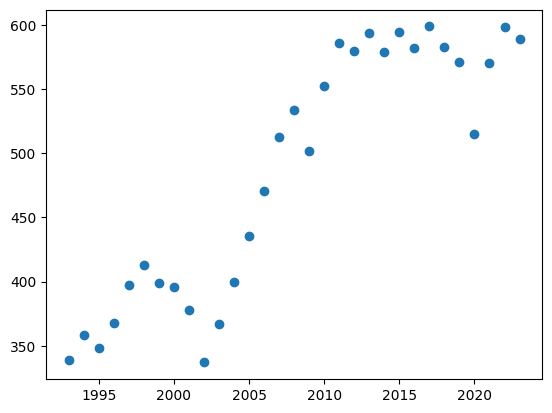

In [5]:
# Scatter plot of GDP
plt.scatter(x='Year', y='GDP (constant 2015 US$) [Billions]', data=df)
plt.show()

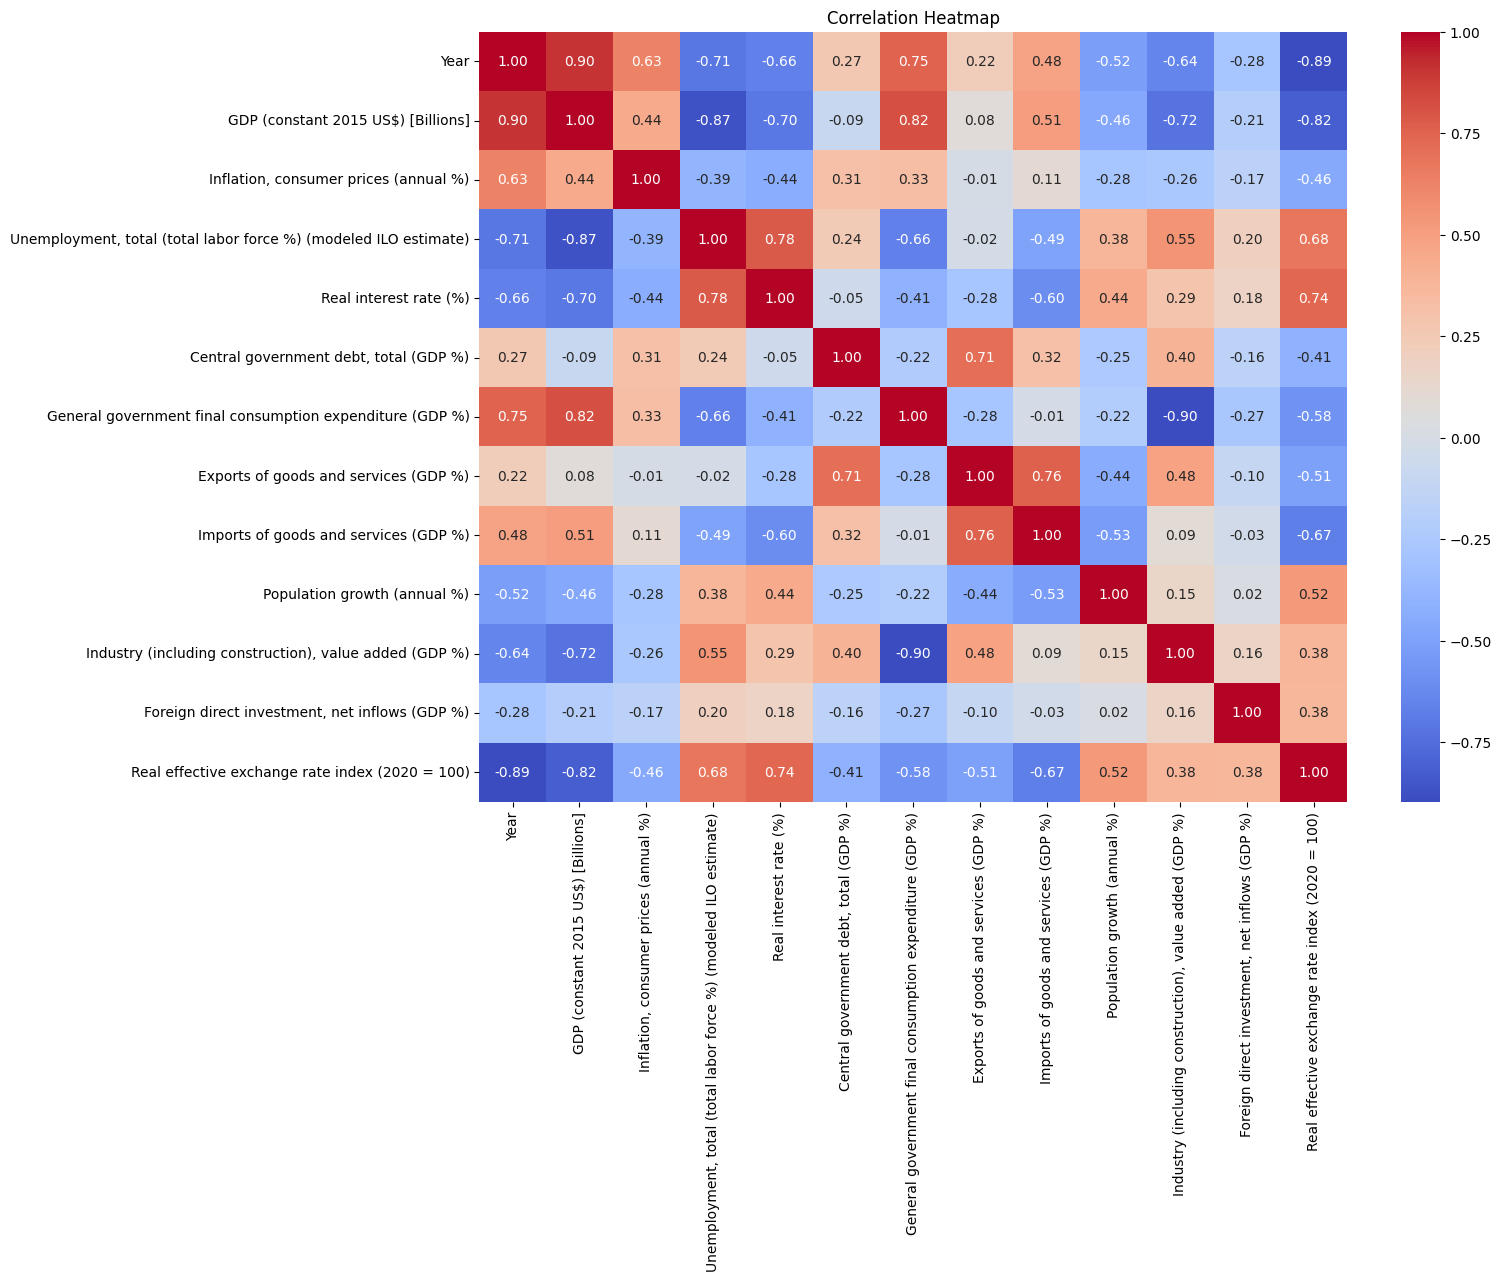

In [6]:
# Correlation Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Correlation Heatmap Analysis

The heatmap shows really interesting correlations between all the variables in the model.
Analyzing every single one could be interesting but for the sake of this repository we will focus on the variables that have strong correlation (|correlation|≥0.7) with GDP:
- Year (0.9): The strong positive correlation with GDP is expected as all economies tend to grow over time.
- General government final consumption expenditure (GDP %) (0.82): Government spending is known to be pro-cyclical in emerging economies, it increases during economic expansions and decreases during recessions.
- Real interest rate (%) (-0.70): This shows that when the economy grows, lower interest rates are expected because central banks usually use the monetary policy to manage economic cycles. If the economy is growing, lower interest rates make borrowing cheaper encouraging both investment and consumption. Also, lower interest rates are related to lower rates of inflation.
- Industry, value added (GDP %) (-0.72):  The strong negative correlation with GDP can indicate structural changes in the economy, as the GDP grows there could be a shift from industry to higher value-added services. This is a common trend in developing economies, when they grow they tend to rely less on traditional industry.
- Real Effective Exchange Rate Index (2020 = 100) (-0.82): A lower REER should increase international competitiveness, because domestic goods become cheaper relative to the foreign goods. This often results in higher exports and lower imports, positively impacting the balance of trade, which in turn improves the balance of payments, and consequently GDP.
- Unemployment, total (total labor force %) (modeled ILO estimate) (-0.87): The negative correlation is expected, this shows that higher GDP generally coincides with lower unemployment rates, reflecting improved economic conditions.

Keep in mind that correlation does not imply causation. High correlation between two variables does not mean that one causes the other, it implies that changes in one variable are associated with changes in the other.

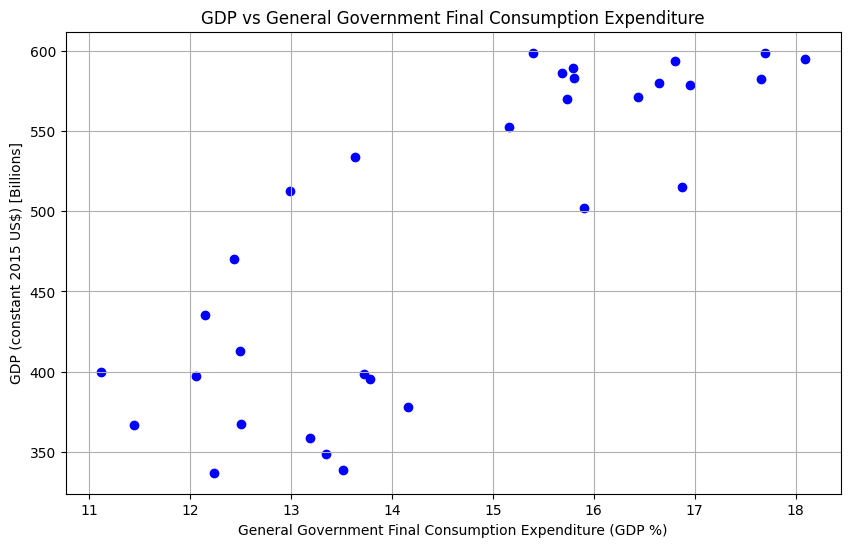

In [16]:
# Scatter plot for GDP vs. General Government Final Consumption Expenditure (GDP %)
plt.figure(figsize=(10, 6))
plt.scatter(df['General government final consumption expenditure (GDP %)'], df['GDP (constant 2015 US$) [Billions]'], color='blue')
plt.title('GDP vs General Government Final Consumption Expenditure')
plt.xlabel('General Government Final Consumption Expenditure (GDP %)')
plt.ylabel('GDP (constant 2015 US$) [Billions]')
plt.grid(True)
plt.show()

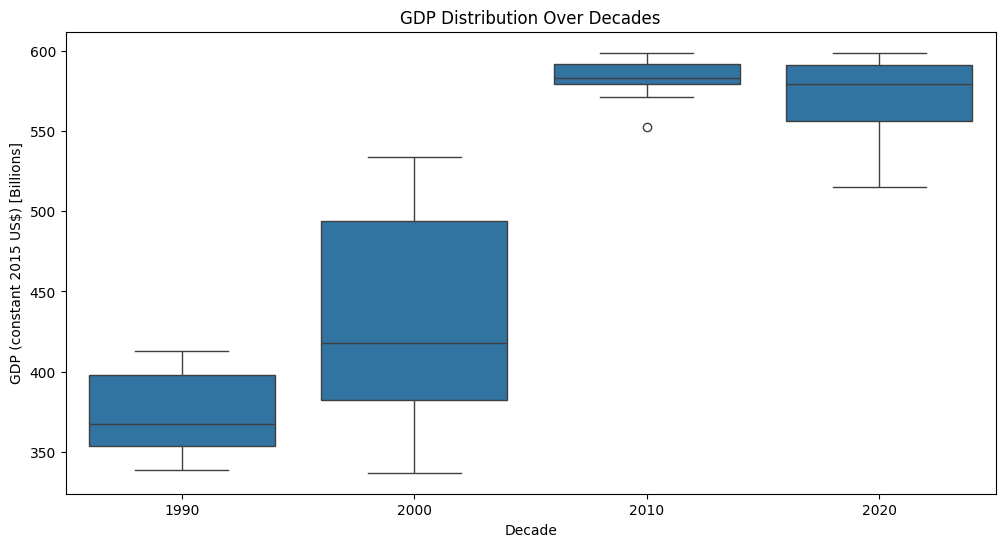

In [8]:
# Create a new column 'Decade'. This column will be used to group the data by decades making it easier to visualize.
df['Decade'] = (df['Year'] // 10) * 10

# Boxplot of GDP over decades
plt.figure(figsize=(12, 6))
sns.boxplot(x='Decade', y='GDP (constant 2015 US$) [Billions]', data=df)
plt.title('GDP Distribution Over Decades')
plt.xlabel('Decade')
plt.ylabel('GDP (constant 2015 US$) [Billions]')
plt.show()

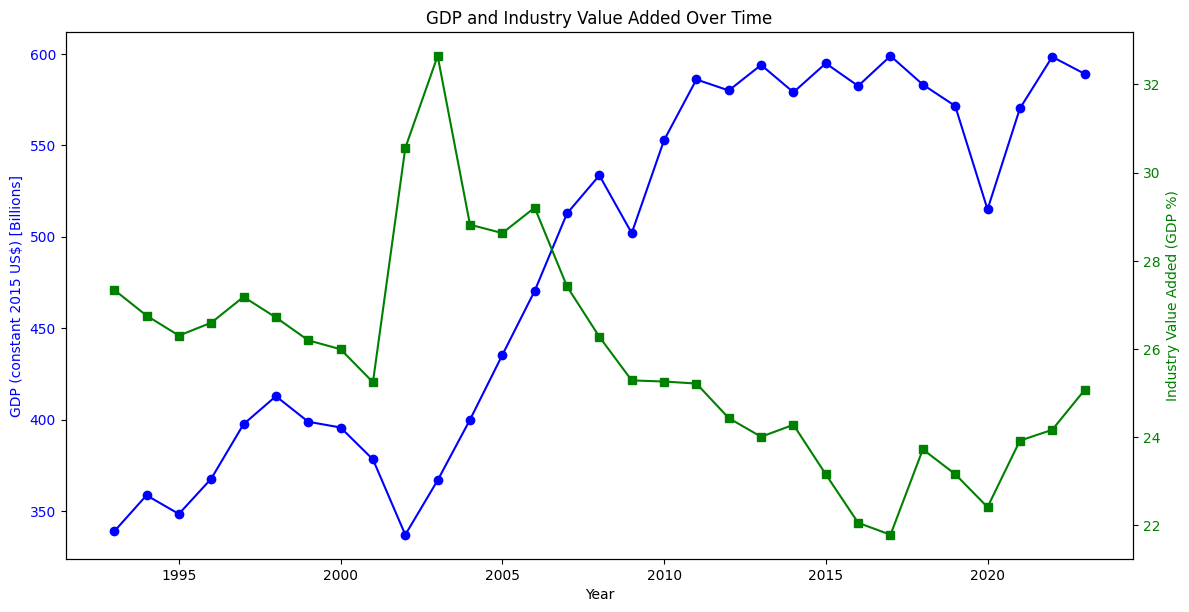

In [10]:
# FacetGrid? of GDP vs Industry Value Added Over Time
# Plot GDP and Industry Value Added Over Time with a secondary y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('GDP (constant 2015 US$) [Billions]', color='blue')
ax1.plot(df['Year'], df['GDP (constant 2015 US$) [Billions]'], color='blue', marker='o', label='GDP')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Industry Value Added (GDP %)', color='green')
ax2.plot(df['Year'], df['Industry (including construction), value added (GDP %)'], color='green', marker='s', label='Industry Value Added')
ax2.tick_params(axis='y', labelcolor='green')

fig.tight_layout()
plt.title('GDP and Industry Value Added Over Time')
plt.show()


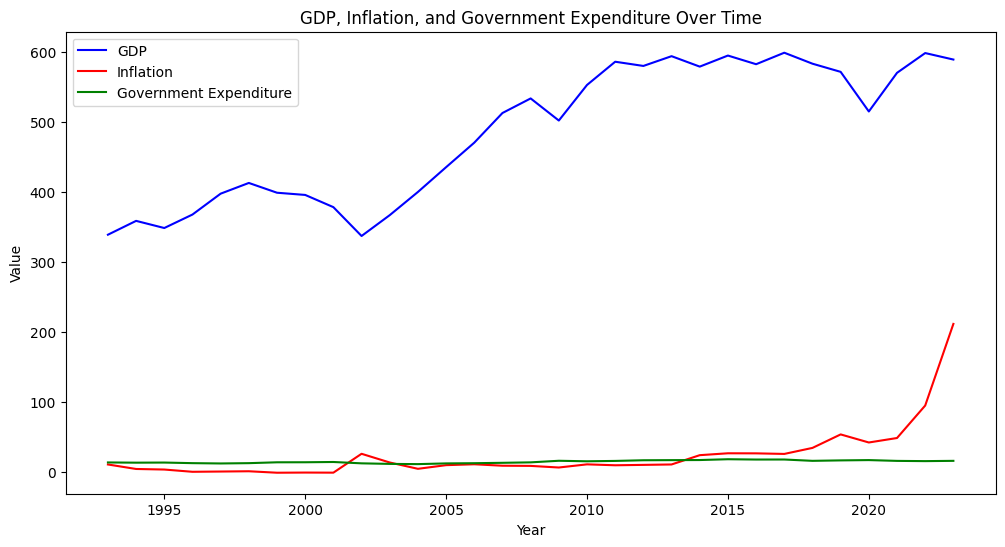

In [11]:
# Time Series Plot of GDP, Inflation, and Government Expenditure Over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['GDP (constant 2015 US$) [Billions]'], label='GDP', color='blue')
plt.plot(df['Year'], df['Inflation, consumer prices (annual %)'], label='Inflation', color='red')
plt.plot(df['Year'], df['General government final consumption expenditure (GDP %)'], label='Government Expenditure', color='green')
plt.legend()
plt.title('GDP, Inflation, and Government Expenditure Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()


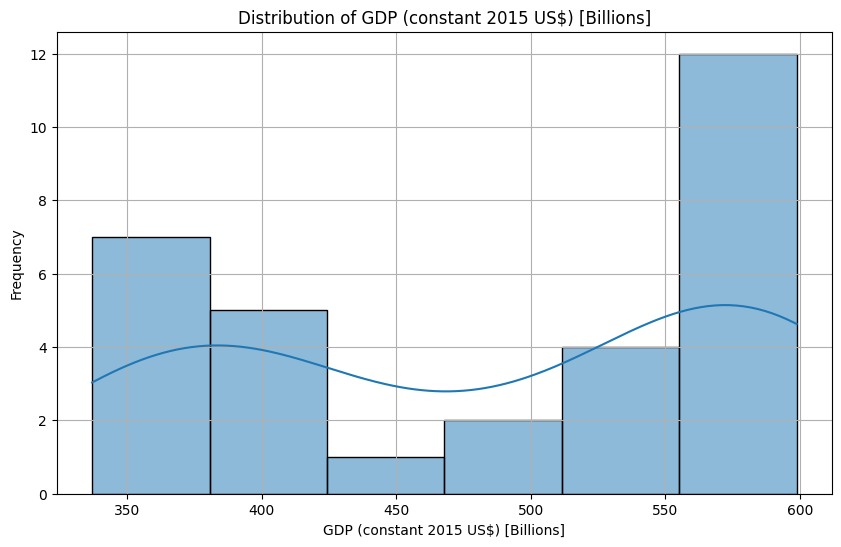

In [12]:
# Distribution Plot of GDP
plt.figure(figsize=(10, 6))
sns.histplot(df['GDP (constant 2015 US$) [Billions]'], kde=True)
plt.title('Distribution of GDP (constant 2015 US$) [Billions]')
plt.xlabel('GDP (constant 2015 US$) [Billions]')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

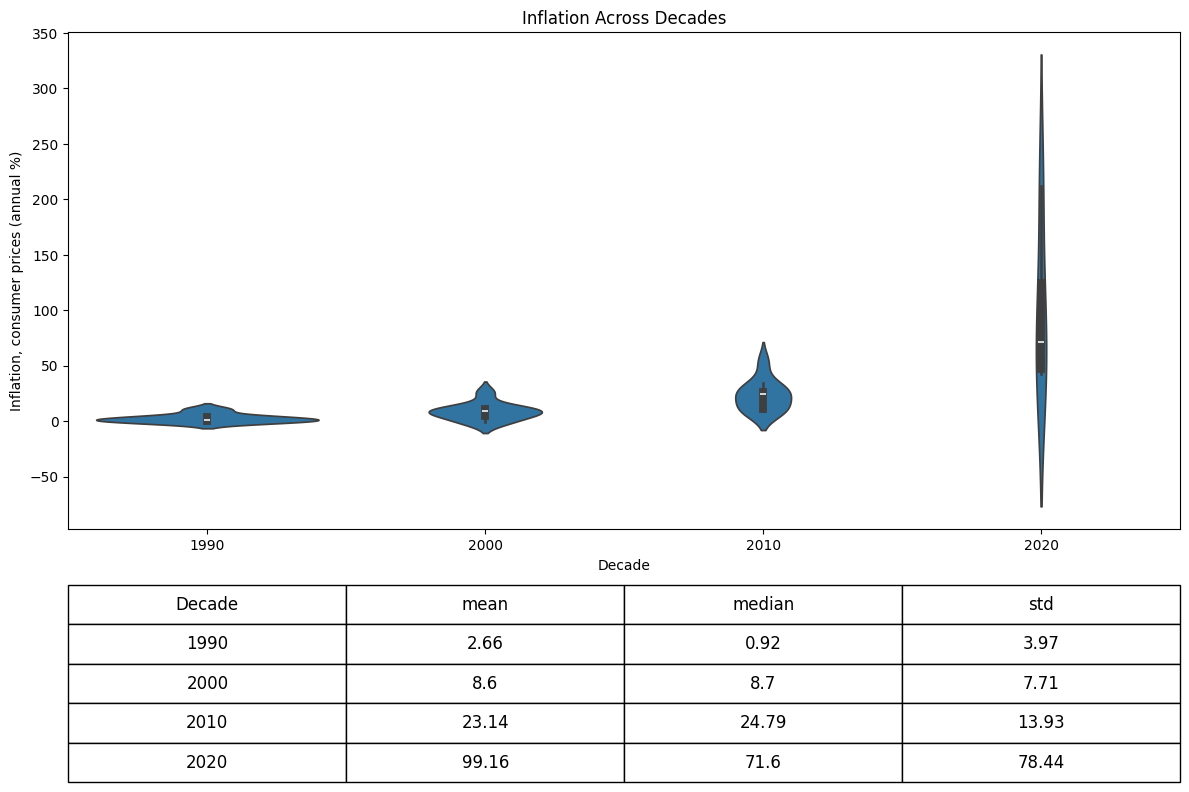

In [13]:
# Violin Plot of Inflation Across Decades with Summary Statistics for better visualization
fig, ax = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [3, 1]})

# Violin plot
sns.violinplot(x='Decade', y='Inflation, consumer prices (annual %)', data=df, ax=ax[0])
ax[0].set_title('Inflation Across Decades')
ax[0].set_xlabel('Decade')
ax[0].set_ylabel('Inflation, consumer prices (annual %)')

# Summary statistics of inflation across decades
df['Decade'] = df['Decade'].astype(str) # We make the 'Decade' column a string to avoid the table from showing decimals
stats = df.groupby('Decade')['Inflation, consumer prices (annual %)'].agg(['mean', 'median', 'std']).reset_index() # stats variable contains the summary statistics
# Round the summary statistics to 2 decimal places for better readability
stats['mean'] = stats['mean'].round(2)
stats['median'] = stats['median'].round(2)
stats['std'] = stats['std'].round(2)

# Table of summary statistics
ax[1].axis('off')
table = ax[1].table(cellText=stats.values, colLabels=stats.columns, cellLoc='center', loc='center') # Create the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)

plt.tight_layout() # Tight layout to avoid overlapping
plt.show()

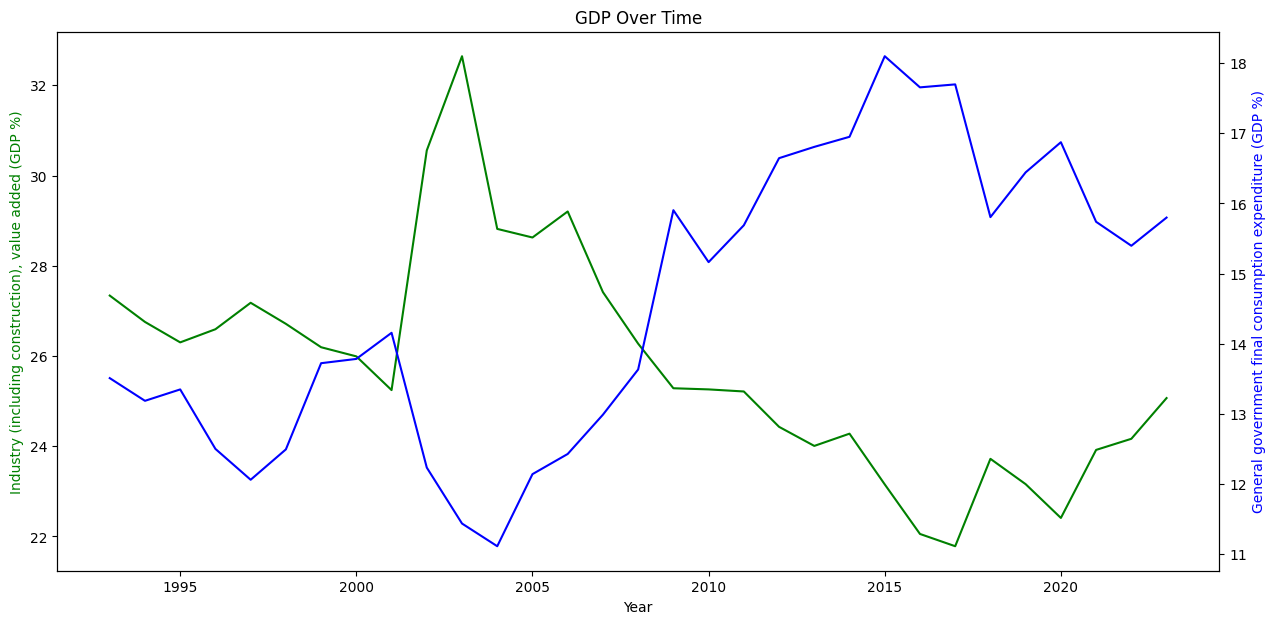

In [14]:
# We will use subplots to plot each variable separately
fig, ax1 = plt.subplots(figsize=(15, 7))

ax2 = ax1.twinx()
ax1.plot(df['Year'], df['Industry (including construction), value added (GDP %)'], 'g-')
ax2.plot(df['Year'], df['General government final consumption expenditure (GDP %)'], 'b-')

ax1.set_xlabel('Year')
ax1.set_ylabel('Industry (including construction), value added (GDP %)', color='g')
ax2.set_ylabel('General government final consumption expenditure (GDP %)', color='b')

plt.title('GDP Over Time')
plt.show()
